### Solutions to EC569 Economic Growth - Problem Set 3

This notebook is in html. To be able to run it, please click: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gunerilhan/economicgrowth/blob/master/ps3/PS3.ipynb)

In [1]:
# First import the packages we'll need
# Numpy is for numerical analysis
import numpy as np
# Pandas is for data storage and manipulation
import pandas as pd
# Matplotlib and seaborn are for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
style.use('https://gunerilhan.github.io/img/fivethirtyeight-modified.mplstyle')

**1** Wakanda and Zakanda are two neighboring countries. Wakanda has a highly advanced technology, whereas, Zakanda has a lower level of technology and lower income per capita. In the usual setting, we would expect Zakanda to learn about Wakanda's technology but Wakanda has been successfully hiding its technology from the rest of the world for centuries. At time $t=0$, Wakanda has a productivity of 10, $A_w = 10$, and 20% of its labor force engage in R\&D, $\gamma_{A,W} = 0.2$.  Zakanda, on the other hand, has a productivity level of 6, $A_Z=6$, and 10\% of its population engages in R\&D, $\gamma_{A,Z}=0.1$. Each country has a labor force equal to 1, $L=1$. Price of invention in each country is equal to 10, $\mu = 10$. Along the line, the following events take place:

- After long soul searching, at time $t=10$, King T'Challa of Wakanda decides to open up Wakanda's technology to Zakanda.

- King T'Chala observes Zakanda's development for 10 periods. But, he is surprised that Zakanda did not imitate Wakanda's technology and it grows at its former pace, as before time $t=10$. He appoints his sister and Chief Scientist of Wakanda, Shuri, as his technology ambassador to Zakanda at time $t=20$.

- With the help of Shuri, Zakanda is able to imitate Wakanda's technology with a cost of copying equal to $\mu_{c} = \mu_i \left(\frac{A_L}{A_F} \right)^{-1/2},$ where $A_L$ is the productivity of technology leader and $A_F$ is the productivity of technology follower. Shuri convinces Zakanda to increase the fraction of workers engaged in R\&D to 15\%, $\gamma_{A,Z}=0.15$

- After observing the progress made since $t=20$, Zakandans increase the fraction of labor force engaging in R\&D to 22\%, $\gamma_{A,Z}=0.22 $ at time $t=50.$

a. Using the appropriate models we covered in Lecture 7 (You need to employ one-country model of technology creation and growth and two-country model of technology creation and growth
in answering this question.), simulate and plot Wakanda and Zakanda productivities and income per worker levels from $t=0$ to $t=250$ considering the events took place. Briefly comment on your graphs. In your graphs, make sure to highlight each event.

b. What might have prevented Zakanda from imitating Wakanda's technology from time $t=10$ to time $t=20$? Briefly explain. (In this question, I expect you to read section 8.4 (Barrier to international technology transfer) of Weil (2013).)

<br>

<center>
<img src="https://media.giphy.com/media/l378hTnSHp8EI0la0/giphy.gif" width="60%"/>
</center>




#### Solution #####

Notice that until $t=20$, Wakanda's technology is hidden from Zakanda. Hence, we need to consider technological progress in each of the countries separately as our one country model. Therefore, to calculate Wakanda's productivity and income over time, first we calculate productivity growth rate:

$$ \widehat{A}_w(t) = \frac{\gamma_{A,w} L }{\mu}$$

Then, we calculate output: 

$$ y_{w}(t) = A_w(t)(1-\gamma_{A,w}) $$

Then, using the growth rate we calculated and current productivity level, we can calculate next period's productivity:

$$ A_w(t+1) = A_w(t)(1+\widehat{A}_w(t))$$

Starting from $t=0$, we repeat these calculations 20 times to get productivity and income of Wakanda for $t=0,...,20$

We calculate Zakanda's productivity and income until t=19 as we did for Wakanda:

$$ \widehat{A}_z(t) = \frac{\gamma_{A,z} L }{\mu}$$

$$ y_{z}(t) = A_z(t)(1-\gamma_{A,z}) $$

$$ A_z(t+1) = A_z(t)(1+\widehat{A}_z(t))$$

Repeat the above calculations 19 times.

Now, at time $t=20$, we observe 2 important developments. First, Zakanda begins imitating Wakanda's technology, and second, Zakanda increases share of labor force engaged in R&D to 0.15, notated as $\gamma_{A,z}^n$, where $n$ represents 'new'. However, as Wakanda is the technology leader, nothing changes for Wakanda, and we can keep calculating Wakanda's income and output as we did before until $t=50$. Now, Zakanda's productivity growth can be calculated as follows:

First, calculate the cost of imitation at time $t$,
$$\mu_{c}(t) = \mu \left(\frac{A_w(t)}{A_z(t)} \right)^{-1/2}$$

Notice that cost of imitation depends on the ratio of productivities in these countries. Hence, we need to calcualte a new cost of imitation at each time $t$. Then we can calculate productivity growth rate in Zakanda,

$$ \widehat{A}_z(t) = \frac{\gamma_{A,z}^n L }{\mu_c(t)}$$

Lastly, we can can calculate output in Zakanda,

$$ y_{z}(t) = A_z(t)(1-\gamma_{A,z}^n) $$

Lastly we need to repeat this from $t=20$ to $t=50$. At time $t=50$, Zakanda increases the faraction of labor force engaged in R&D to .22. Now, we repeat the above process with the most recent $\gamma_{A,z}$. This will go on for a while, until the point Zakanda's productivity surpases Wakanda's productivity. Then, Zakanda will become the technology leader. Therefore, after that time, cost of innovation in Zakanda will be equal to cost of invention, and cost of innovation in Wakanda will be equal to cost of copying. 

$$\mu_{c}(t) = \mu \left(\frac{A_z(t)}{A_w(t)} \right)^{-1/2}$$

$$ \widehat{A}_z(t) = \frac{\gamma_{A,z}^n L }{\mu}$$

$$ \widehat{A}_w(t) = \frac{\gamma_{A,w}^n L }{\mu_c(t)}$$

We will iterate this process until $t=250.$






In [2]:
# First I define the parameter values in Python #
T  = 300 # number of time periods (you are supposed to simulate 250 periods, but it's fine if you simulate more)
mu = 10 # cost of invention 
L = 1 # labor force
gamma_w = .2*np.ones(T) # fraction of workers engaged in R&D in Wakanda, this is list of values equal to 0.2
# fraction of workers engaged in R&D in Zakanda
gamma_z = np.zeros(T) # create a list of zeros, and then change the values according to the info from the q.
for t in range(T):
    if t<20:
        gamma_z[t] = .1
    elif 20<=t<50:
        gamma_z[t] = .15
    else:
        gamma_z[t] = .22
A_w = np.zeros(T) # productivity in Wakanda, it will be replaced by actual values
A_w[0] = 10 # initial productivity
A_z = np.zeros(T) # productivity in Zakanda, it will be replaced by actual values
A_z[0] = 6 # inital productivity
A_z_hat=np.zeros(T-1)  # productivity growth in Zakanda, it will be replaced by actual values
A_w_hat=np.zeros(T-1)   # productivity growth in Wakanda, it will be replaced by actual values
mu_c_seq = np.zeros(T) # sequence of cost of copying. It will be replaced by actual values

In [3]:
# this is the algorithm I described above
for t in range(T-1):
    # when t<10, each country is independent
    if t<20:
        A_w_hat[t] = gamma_w[t]*L/mu # find the growth rate
        A_w[t+1] = A_w[t]*(1+A_w_hat[t]) # calculate next period's productivity
        mu_c = mu
        A_z_hat[t] = gamma_z[t]*L/mu_c
        A_z[t+1] = A_z[t]*(1+A_z_hat[t])
    # after t > 20, if the productivity of Wakanda is greater than Zakanda's, 
    # Wakanda is the technology leader, and Zakanda enjoys copying
    elif (A_w[t]>A_z[t]):
        A_w_hat[t] = gamma_w[t]*L/mu
        A_w[t+1] = A_w[t]*(1+A_w_hat[t])
        mu_c = mu*(A_w[t]/A_z[t])**(-1/2) # # cost of copying 
        A_z_hat[t] = gamma_z[t]*L/mu_c
        A_z[t+1] = A_z[t]*(1+A_z_hat[t]) 
    # after t > 20, if the productivity of Zakanda is greater than Wakanda's, 
    # Zakanda is the technology leader, and Wakanda enjoys copying
    else:
        A_z_hat[t] = gamma_z[t]*L/mu
        A_z[t+1] = A_z[t]*(1+A_z_hat[t])
        mu_c = mu*(A_z[t]/A_w[t])**(-1/2) # cost of copying but Zakanda as the tech. leader
        A_w_hat[t] = gamma_w[t]*L/mu_c
        A_w[t+1] = A_w[t]*(1+A_w_hat[t]) 
    # assign mu_c to mu_s_seq
    mu_c_seq[t] = mu_c
y_w = (1-gamma_w)*A_w # output per worker in Wakanda
y_z = (1-gamma_z)*A_z # output per worker in Zakanda

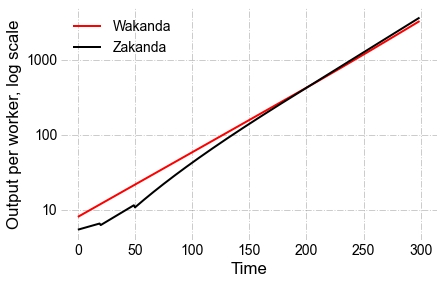

In [4]:
fig,ax = plt.subplots()
ax.plot(y_w,'r',linewidth=2,label="Wakanda")
ax.plot(y_z,'k',linewidth=2,label='Zakanda')
ax.set_yscale('log')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([10,100,1000])
ax.set_yticklabels([10,100,1000]);
ax.legend(loc='best',frameon=False)
ax.set_xlabel('Time')
ax.set_ylabel('Output per worker, log scale');

Note that Zakanda's output jumps down twice as a result of higher fraction of labor force engaged in R&D. However, after the jumps, Zakanda grows at a higher rate than before. Eventually, Zakanda catches Wakanda.

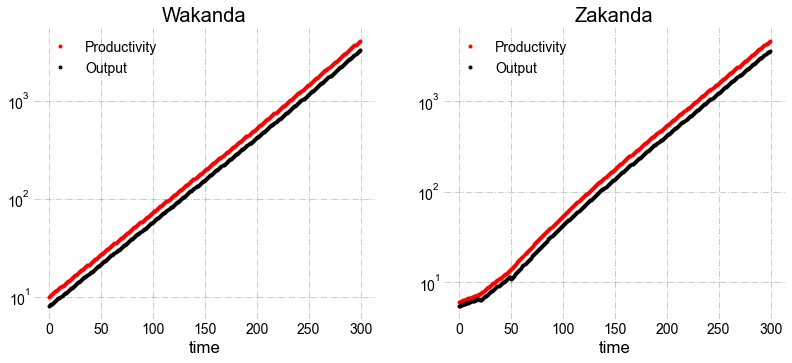

In [5]:
# let's plot each country separately
num_rows, num_cols = 1 ,2 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5))
axes[0].plot(range(T),A_w,'r.',linewidth=.1,label='Productivity')
axes[0].plot(range(T),y_w,'k.',linewidth=.1,label='Output')  
axes[0].set_title('Wakanda')
axes[1].plot(range(T),A_z,'r.',linewidth=.1,label='Productivity')
axes[1].plot(range(T),y_z,'k.',linewidth=.1,label='Output')  
axes[1].set_title('Zakanda')
for i in range(num_cols):
    axes[i].set_yscale('log')
    axes[i].legend(loc='best',frameon=False)
    axes[i].set_xlabel('time')
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
plt.savefig('graphs1.pdf')

The graph on the left is for Wakanda, and the graph on the right is for Zakanda. As you see, productivity and ouput in Wakanda increase substantially over 300 periods. Levels of productivity and output in Wakanda are much higher than those of Wakanda.

Zakanda's productivity and income increases until t=20. As Zakanda begins imitating Wakanda's technology, it is able to increase its productiviity at higher rates. We also observe jump downs in Zakanda's output at $t=20$ and at $t=50$ as Zakanda increases fraction of labor force engaged in R&D. This leads to a temporary reduction in output, but higher productivity achieved in the subsequent periods compensantes for the reduced production workers and Zakanda enjoys higher output levels.

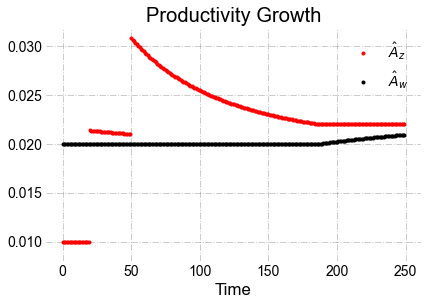

In [6]:
# now let's look at the productivity growth rates
fig,ax = plt.subplots()
ax.plot(A_z_hat[:250],'r.',linewidth=2,label=r'$\hat{A}_z$')
ax.plot(A_w_hat[:250],'k.',linewidth=2,label=r'$\hat{A}_w$')
ax.legend(loc='best',frameon=False)
ax.set_xlabel('Time')
ax.set_ylim(ymin=0.008)
ax.set_title('Productivity Growth');
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Wakanda's productivity growth rate is constant and equal to .2 until period 188 as it is the technology leader and there is no change in the fraction of labor force engaged in R&D. However, at period 188, Zakanda catches up Wakanda's technology level and becomes the technology leader. After this period, Wakanda observes a higher productivity growth, as the cost of innovation goes down for Wakanda. Zakanda's productivity growth rate, on the other hand, is equal to 0.01 until $t=20$ as it alocates substantially lower fraction of labor force to R&D than Wakanda. However, at $t=20$, because of imitation and increase in R&D labor, Zakanda's productivity growth rate jumps to .021, which is higher than Wakanda's productivity growth rate. Because of this, Zakanda's productivity converges to Wakanda's, and cost of imitation increaes. Remember, cost of imitation is inversely related to productivity differences in the two countries. As cost imitation increases, Zakanda's productivity growth rate decreases and converges to Wakanda's. After the peprid $t=50$, Zakanda increases R&D labor further, which leads to higher productivity growth rate, .31 at period $t=50$. As Zakanda's productivity converges to the Wakanda, productivity growth rate of Zakanda goes down. At period $t=188$, Zakanda catches Wakanda, becomes the technology leader, and enjoys a constant growth rate of .022. 

In [7]:
productivity = pd.DataFrame({'Productivity (Wakanda)':A_w[:250],
                            'Productivity (Zakanda)':A_z[:250],
                           'Output per worker (Wakanda)':y_w[:250],
                            'Output per worker (Zakanda)':y_z[:250],
                            'Productivity Growth (Wakanda)':A_w_hat[:250],
                            'Productivity Growth (Zakanda)':A_z_hat[:250],
                             'Cost of copying':mu_c_seq[:250]})

In [8]:
productivity.to_csv('ps3-q1.csv')

In [9]:
productivity.loc[29:31]

,Productivity (Wakanda),Productivity (Zakanda),Output per worker (Wakanda),Output per worker (Zakanda),Productivity Growth (Wakanda),Productivity Growth (Zakanda),Cost of copying
29,17.758447,8.851412,14.206758,7.523700,0.02,0.021247,7.059985
30,18.113616,9.039474,14.490893,7.683553,0.02,0.021234,7.064298
31,18.475888,9.231414,14.780711,7.846702,0.02,0.021221,7.068568


 In questions 2 and 3, using  [Penn World Table](https://www.rug.nl/ggdc/productivity/pwt/), you will do development accounting and growth accounting. In these questions, use 'rgdpo' (Output-side real GDP at chained PPPs (in mil. 2017USD)) as a measure of real GDP, use 'cn' (Capital stock at current PPPs (in mil. 2017USD)) as a measure of real capital stock, use 'emp' (Number of persons engaged (in millions)) as a measure of employment, and use 'hc' (Human capital index, based on years of schooling and returns to education) as a measure of human capital. You don't need to divide 'hc' with employment numbers as 'hc' is already a measure of average human capital in a society. Assume $\alpha=1/3$ for questions 2 and 3.

In [10]:
# Here, I download the Penn World Tables legend
df_legend = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt100.xlsx',sheet_name='Legend')
df_legend.dropna(inplace=True,subset=['Variable name','Variable definition'])
# I create a dictionary of variables names and definitions
df_legend = dict(zip(df_legend['Variable name'],df_legend['Variable definition']))

In [11]:
# Here are the variables, we will need in this analysis
print('rgdpo = ', df_legend['rgdpo'])
print('cn = ', df_legend['cn'])
print('emp = ', df_legend['emp'])
print('hc =', df_legend['hc'])

rgdpo =  Output-side real GDP at chained PPPs (in mil. 2017US$)
cn =  Capital stock at current PPPs (in mil. 2017US$)
emp =  Number of persons engaged (in millions)
hc = Human capital index, based on years of schooling and returns to education; see Human capital in PWT9.


In [ ]:
# now download the data
df = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt100.xlsx',sheet_name='Data')

In [ ]:
# create GDP per worker and physical capital per worker
df['gdpPerworker'] = df['rgdpo']/df.emp
df['capPerworker'] = df['cn']/df.emp

**2.** Using 2019 values in Penn World Table, conduct development accounting of Argentina,
Germany, Bulgaria and Japan relative to the United Kingdom. Create a table summarizing
your results. Briefly comment on the table.

In [ ]:
# These are the list of countries we will analyze
country_list_2  = ['ARG','DEU','BGR','JPN','GBR']

**Solution:** Divide GDP per worker, capital per worker, human capital per worker by the Great Britain values. 

Lastly, calculate productivity differences as follows:
$$\frac{A_i}{A_{GBR}}=\frac{\frac{y_i}{y_{GBR}}}{\frac{k_i^\alpha h_i^{1-\alpha}}{k_{GBR}^\alpha h_{GBR}^{1-\alpha}}}$$


In [ ]:
# select 2019 values
df_2019 = df[df.year==2019].copy()
# I drop observations with missing values on 'gdpPerworker','capPerworker','hc' columns
df_2019 = df_2019.dropna(subset=('gdpPerworker','capPerworker','hc'))
# create new dataframe for UK values, as these will be used many times
GBR = df_2019[df_2019.countrycode=='GBR']

# I add extra columns to our df_2019 data
df_2019['gdpPerworker, GBR'] = GBR['gdpPerworker'].values[0] # gdp per worker of the UK
df_2019['capPerworker, GBR'] = GBR['capPerworker'].values[0] # capital per worker of the UK
df_2019['hc, GBR'] = GBR['hc'].values[0] # human capital per worker of the UK
# relative to the uk
df_2019['Rel. output per worker, y'] = df_2019['gdpPerworker']/df_2019['gdpPerworker, GBR']
df_2019['Rel. physical capital per worker, k'] = df_2019['capPerworker']/df_2019['capPerworker, GBR']
df_2019['Rel. human capital per worker, h'] = df_2019['hc']/df_2019['hc, GBR']

# factors of production relative to the UK
df_2019['Rel. factors of production'] = (df_2019['Rel. physical capital per worker, k']**(1/3)*
                                      df_2019['Rel. human capital per worker, h']**(2/3))

# productivity relative to the UK
df_2019['Rel. productivity, A'] = df_2019['Rel. output per worker, y']/df_2019['Rel. factors of production']


df_2019[df_2019.countrycode.isin(country_list_2)][['country','Rel. output per worker, y',
                                                   'Rel. physical capital per worker, k',
                                                   'Rel. human capital per worker, h',
                                                   'Rel. factors of production',
                                                   'Rel. productivity, A']].round(decimals=2).set_index('country')

In [ ]:
# Next, I'll plot bar graphs depicting the factors of production relative to the UK
# I'll rename columns

# These are the columns to be renamed
cols = ['Rel. output per worker, y',
       'Rel. physical capital per worker, k',
       'Rel. human capital per worker, h',
        'Rel. factors of production',
        'Rel. productivity, A']
# these are the new names of the columns
cols2 = ['Output per worker',
       'Physical capital per worker',
       'Human capital per worker',
        'Factors of production',
        'Productivity']
# I'll need this dictionary
cols_rename = dict(zip(cols,cols2))
# As all the data will be relative to the UK, I don't need to plot UK (all of them will be equal to 1)
country_list_2.remove('GBR')

# this procedure, does the following steps
# 1) selects only the countries that we are interested in
# 2) selects only the variables we are interested in
# 3) renames columns
# 4) converts columns into rows
# 5) sorts data by country
df_bar = df_2019[df_2019.countrycode.isin(country_list_2)][['country',*cols]].rename(columns=cols_rename).melt(
    id_vars='country',value_vars=cols2,var_name='Factor',value_name='Relative to UK').sort_values('country')

In [ ]:
# let's plot our results
g = sns.catplot(x='country', y="Relative to UK", hue="Factor", 
                data=df_bar[df_bar.Factor.isin(['Output per worker',
                                            'Factors of production',
                                            'Productivity'])],
                                        height=6, kind="bar")
g.despine(left=True)
g.set_ylabels("Fraction of UK")
g.set_xlabels('Country')

High income countries like Japan and Germany have high factors of production and high productivity. Middle income countries like Argentina and Bulgaria have lower factors of production and productivity than the UK. However, Argentina and Bulgaria's productivities relative to the UK are greater than their factors of production relative to the UK. 

**3.** Conduct growth accounting of Italy, Greece, Spain, South Korea and the United Kingdom.
Examine data from 1970 to 2019. Create a table summarizing your results. Briefly comment
on the table.

In [ ]:
# These are the list of countries we will analyze
country_list_3  = ['ITA','GRC','ESP','KOR','GBR']

In [ ]:
# here I select the countries we are interested in and also years we are interested in
df3 = df[(df.countrycode.isin(country_list_3))&(df.year.isin([1970,2019]))][
    ['country','year','gdpPerworker','capPerworker','hc']].copy()
# sort values
df3.sort_values(['country','year'],inplace=True)
df3.set_index(['country','year'],inplace=True)

In [ ]:
# here is the data to work on
df3

In [ ]:
# now calucalate the factor growth rates and productivity growth rates using formulas described in the question
# growth rate of x from t to t+n = (log(x_{t+n})-log(x_t))/n
def growth_rates(group):
    return (group.iloc[1].apply(np.log)-group.iloc[0].apply(np.log))/49

df3_growth=df3.groupby('country',axis=0).apply(growth_rates)

# productivity growth rate = growth rate of gdp per worker - alpha*growth rate of physical capital per worker 
#                                                        - (1-alpha)* growth rate og human capital per worker
alpha=1/3
df3_growth['productivity'] = (df3_growth['gdpPerworker'] - alpha*df3_growth['capPerworker']
                               - (1-alpha)*df3_growth['hc'])

In [ ]:
# here is our results
df3_growth.round(decimals=3)

In [ ]:
# now calculate the shares of contribution of economic growth
# contribution of hc = (1-alpha)*growth rate of human capital / (growth rate of gdp per worker)
# contribution of k = (alpha)*growth rate of physical capital / (growth rate of gdp per worker)
# contribution of A = growth rate of productivity / (growth rate of gdp per worker)

weight = np.array([((1-alpha),alpha,1)])
weight.shape = (1,3)
income = df3_growth['gdpPerworker'].values
income.shape = (5,1)
## I multiply growth rate of hc with (1-alpha),
#              growth rate of k with alpha
#             growth rate of A with 1
# I divide each of the above by growth rate of gdp per worker
df3_growth_cont = df3_growth[['hc','capPerworker','productivity']].multiply(weight)/income
# rename columns
df3_growth_cont.columns=['Human Capital','Physical Capital','Productivity']
# Here is our results, contributions to economic growth
(df3_growth_cont).round(2)

In [ ]:
# convert columns into rows
df3_growth_cont.reset_index().melt(id_vars='country',var_name='Factor')

In [ ]:
# plot the data
g = sns.catplot(x='country', y="value", hue="Factor", data=df3_growth_cont.reset_index()
                .melt(id_vars='country',var_name='Factor'),
                height=6, aspect=2,kind="bar")
g.despine(left=True,bottom=True)
g.set_ylabels("Contribution to growth")
g.set_xlabels("")